In [53]:
!pip install neuralprophet

In [54]:
import pandas as pd
from neuralprophet import NeuralProphet
from matplotlib import pyplot as plt
import pickle

In [55]:
df.columns

Index(['date', 'location', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon'],
      dtype='object')

In [56]:
df = pd.read_csv(r'C:\Users\logi\Downloads\Chennai DEC(1-20-23-22).csv')
df.head()


,date,location,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,...,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon
0,2020-12-01,Chennai,30.0,24.1,27.0,23.0,79.6,0.000,0.0,0.00,...,183.3,15.9,7,NaN,2020-12-01 6:15:41,2020-12-01 17:40:15,0.51,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
1,2020-12-02,Chennai,28.0,26.0,26.8,24.3,86.0,8.000,100.0,4.17,...,137.4,11.8,5,NaN,2020-12-02 6:16:14,2020-12-02 17:40:29,0.53,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain
2,2020-12-03,Chennai,28.0,25.0,26.4,25.2,93.0,72.218,100.0,25.00,...,77.2,6.6,3,NaN,2020-12-03 6:16:47,2020-12-03 17:40:44,0.55,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain
3,2020-12-04,Chennai,27.0,24.0,26.0,24.9,93.6,60.275,100.0,20.83,...,61.9,5.5,2,NaN,2020-12-04 6:17:19,2020-12-04 17:41:00,0.58,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain
4,2020-12-05,Chennai,28.0,25.0,26.2,25.1,93.7,32.548,100.0,12.50,...,93.3,8.0,3,NaN,2020-12-05 6:17:52,2020-12-05 17:41:16,0.62,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain


In [57]:
df.location

0      Chennai
1      Chennai
2      Chennai
3      Chennai
4      Chennai
        ...   
748    Chennai
749    Chennai
750    Chennai
751    Chennai
752    Chennai
Name: location, Length: 753, dtype: object

In [58]:
df.columns


Index(['date', 'location', 'tempmax', 'tempmin', 'temp', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon'],
      dtype='object')

In [59]:
df.dtypes

date                 object
location             object
tempmax             float64
tempmin             float64
temp                float64
dew                 float64
humidity            float64
precip              float64
precipprob          float64
precipcover         float64
preciptype           object
windgust            float64
windspeed           float64
winddir             float64
sealevelpressure    float64
cloudcover          float64
visibility          float64
solarradiation      float64
solarenergy         float64
uvindex               int64
severerisk          float64
sunrise              object
sunset               object
moonphase           float64
conditions           object
description          object
icon                 object
dtype: object

In [60]:
chn = df[df['location']=='Chennai']
chn['date'] = pd.to_datetime(chn['date'])
chn.head()

,date,location,tempmax,tempmin,temp,dew,humidity,precip,precipprob,precipcover,...,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon
0,2020-12-01,Chennai,30.0,24.1,27.0,23.0,79.6,0.000,0.0,0.00,...,183.3,15.9,7,NaN,2020-12-01 6:15:41,2020-12-01 17:40:15,0.51,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day
1,2020-12-02,Chennai,28.0,26.0,26.8,24.3,86.0,8.000,100.0,4.17,...,137.4,11.8,5,NaN,2020-12-02 6:16:14,2020-12-02 17:40:29,0.53,"Rain, Overcast",Cloudy skies throughout the day with late afte...,rain
2,2020-12-03,Chennai,28.0,25.0,26.4,25.2,93.0,72.218,100.0,25.00,...,77.2,6.6,3,NaN,2020-12-03 6:16:47,2020-12-03 17:40:44,0.55,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain
3,2020-12-04,Chennai,27.0,24.0,26.0,24.9,93.6,60.275,100.0,20.83,...,61.9,5.5,2,NaN,2020-12-04 6:17:19,2020-12-04 17:41:00,0.58,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain
4,2020-12-05,Chennai,28.0,25.0,26.2,25.1,93.7,32.548,100.0,12.50,...,93.3,8.0,3,NaN,2020-12-05 6:17:52,2020-12-05 17:41:16,0.62,"Rain, Overcast",Cloudy skies throughout the day with rain clea...,rain


In [61]:
chn.dtypes

date                datetime64[ns]
location                    object
tempmax                    float64
tempmin                    float64
temp                       float64
dew                        float64
humidity                   float64
precip                     float64
precipprob                 float64
precipcover                float64
preciptype                  object
windgust                   float64
windspeed                  float64
winddir                    float64
sealevelpressure           float64
cloudcover                 float64
visibility                 float64
solarradiation             float64
solarenergy                float64
uvindex                      int64
severerisk                 float64
sunrise                     object
sunset                      object
moonphase                  float64
conditions                  object
description                 object
icon                        object
dtype: object

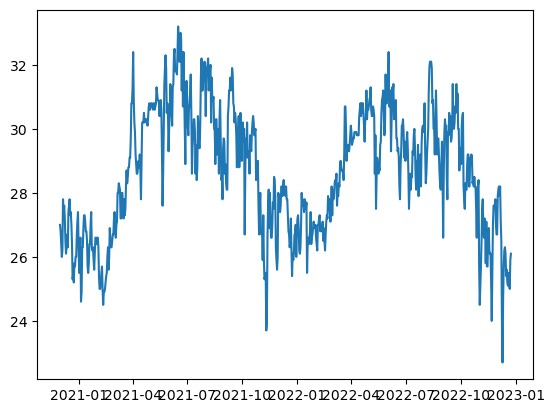

In [62]:
plt.plot(chn['date'], chn['temp'])
plt.show()

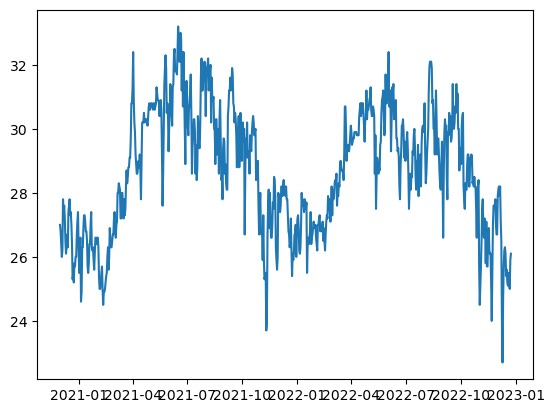

In [63]:
chn['Year'] = chn['date'].apply(lambda x: x.year)
chn = chn[chn['Year']<=2022]
plt.plot(chn['date'], chn['temp'])
plt.show()

In [64]:
data = chn[['date', 'temp']] 
data.dropna(inplace=True)
data.columns = ['ds', 'y'] 
data.head()

WARNING - (py.warnings._showwarnmsg) - C:\Users\logi\AppData\Local\Temp\ipykernel_27404\1525779460.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)



,ds,y
0,2020-12-01,27.0
1,2020-12-02,26.8
2,2020-12-03,26.4
3,2020-12-04,26.0
4,2020-12-05,26.2


In [65]:
m = NeuralProphet()
m.fit(data, freq='D', epochs=1000)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.867% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 16
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (48) is too small than the required number for the learning rate finder (223). The results might not be optimal.


Finding best initial lr:   0%|          | 0/223 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,24.615816,26.250154,1.754945,0.0,0
1,23.684151,25.341558,1.666496,0.0,1
2,23.056496,24.722475,1.611789,0.0,2
3,22.166199,23.803320,1.510656,0.0,3
4,21.181273,22.797323,1.432078,0.0,4
...,...,...,...,...,...
995,0.713604,0.887716,0.003793,0.0,995
996,0.712035,0.885337,0.003816,0.0,996
997,0.699478,0.872055,0.003722,0.0,997
998,0.706942,0.877259,0.003768,0.0,998


In [66]:
future = m.make_future_dataframe(data, periods=1200)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.867% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-24,None,25.626116,27.146824,-1.555929,0.035221
1,2022-12-25,None,25.617142,27.137838,-1.611093,0.090397
2,2022-12-26,None,25.483183,27.128853,-1.666494,0.020825
3,2022-12-27,None,25.465769,27.119867,-1.721803,0.067704
4,2022-12-28,None,25.341351,27.110882,-1.776702,0.007171


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


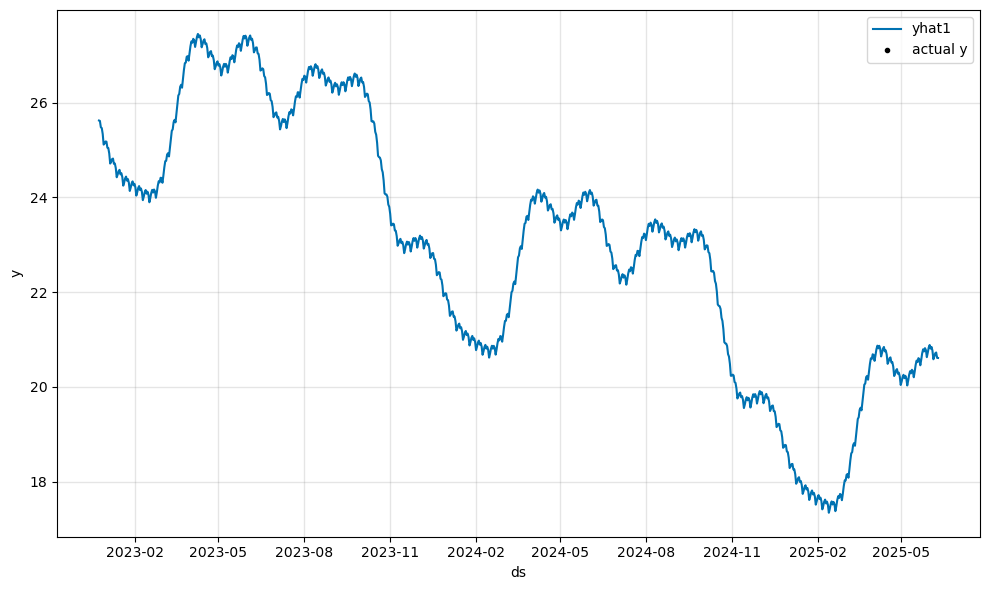

In [67]:
plot1 = m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


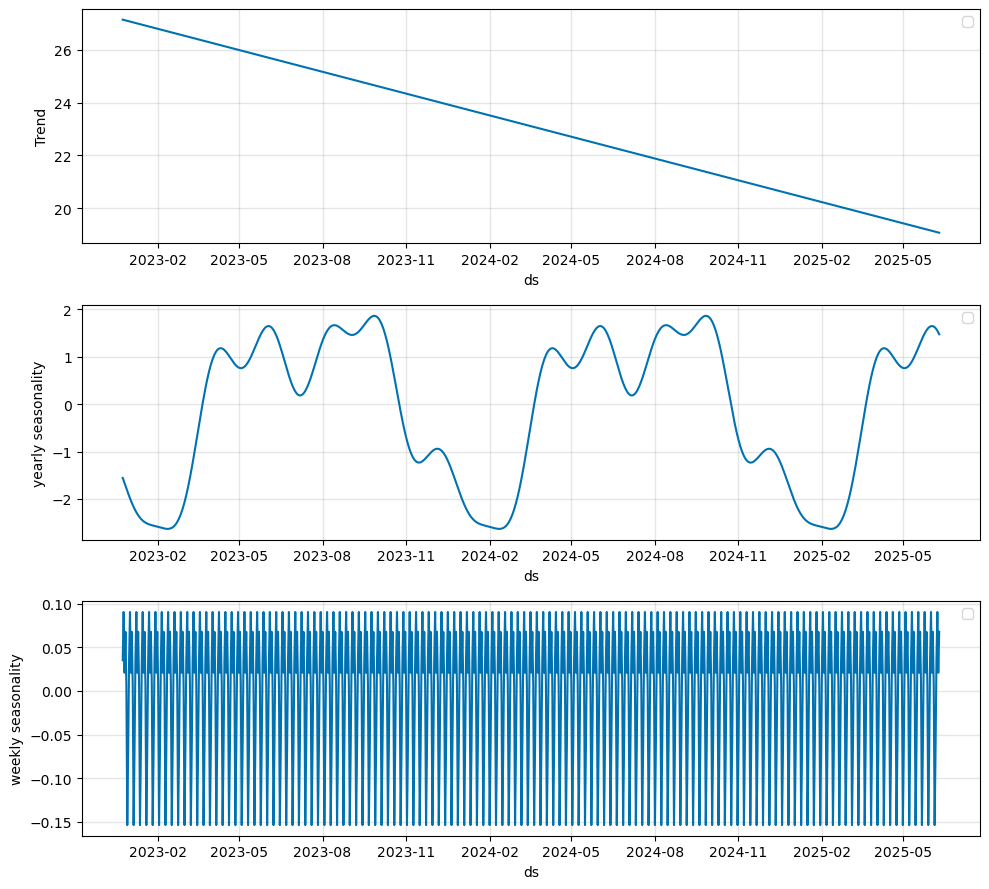

In [68]:
plt2 = m.plot_components(forecast)

In [69]:
with open('saved_model.pkl', "wb") as f:
    pickle.dump(m, f)

In [70]:
del m

In [71]:
with open('saved_model.pkl', "rb") as f:
    m = pickle.load(f)


In [72]:
future = m.make_future_dataframe(data, periods=1200)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.867% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-24,None,25.626116,27.146824,-1.555929,0.035221
1,2022-12-25,None,25.617142,27.137838,-1.611093,0.090397
2,2022-12-26,None,25.483183,27.128853,-1.666494,0.020825
3,2022-12-27,None,25.465769,27.119867,-1.721803,0.067704
4,2022-12-28,None,25.341351,27.110882,-1.776702,0.007171


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


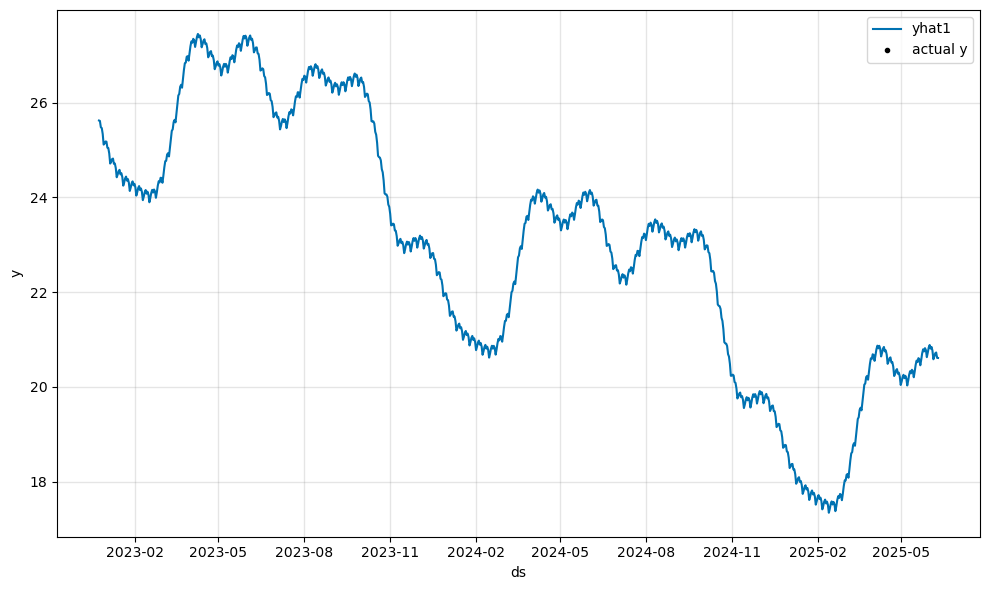

In [73]:
plot1 = m.plot(forecast)